In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
dt = pd.to_datetime(df.login_time.values)

In [4]:
dt

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', length=93142, freq=None)

In [5]:
df = pd.Series(index=dt,data=1)
#df.drop('login_time', axis = 1,inplace=True)

In [6]:
df.head()

1970-01-01 20:13:18    1
1970-01-01 20:16:10    1
1970-01-01 20:16:37    1
1970-01-01 20:16:36    1
1970-01-01 20:26:21    1
dtype: int64

In [7]:
df.tail(10)

1970-04-13 18:36:53    1
1970-04-13 18:40:31    1
1970-04-13 18:46:06    1
1970-04-13 18:40:40    1
1970-04-13 18:48:52    1
1970-04-13 18:50:19    1
1970-04-13 18:43:56    1
1970-04-13 18:54:02    1
1970-04-13 18:57:38    1
1970-04-13 18:54:23    1
dtype: int64

In [8]:
df.isnull().sum()

0

In [9]:
dx = df.resample('15T').sum()
dx.head()

1970-01-01 20:00:00    2.0
1970-01-01 20:15:00    6.0
1970-01-01 20:30:00    9.0
1970-01-01 20:45:00    7.0
1970-01-01 21:00:00    1.0
Freq: 15T, dtype: float64

In [10]:
dx[dx.isnull()]
#Need to find the origin of these NaN's

1970-01-01 21:30:00   NaN
1970-01-02 04:15:00   NaN
1970-01-02 06:15:00   NaN
1970-01-02 18:00:00   NaN
1970-01-03 08:45:00   NaN
1970-01-03 10:00:00   NaN
1970-01-03 10:15:00   NaN
1970-01-04 07:15:00   NaN
1970-01-05 06:30:00   NaN
1970-01-05 07:00:00   NaN
1970-01-05 08:00:00   NaN
1970-01-05 19:30:00   NaN
1970-01-06 05:15:00   NaN
1970-01-06 06:45:00   NaN
1970-01-06 07:30:00   NaN
1970-01-06 16:00:00   NaN
1970-01-06 19:00:00   NaN
1970-01-07 09:00:00   NaN
1970-01-08 05:00:00   NaN
1970-01-08 05:30:00   NaN
1970-01-08 06:00:00   NaN
1970-01-08 06:30:00   NaN
1970-01-08 15:00:00   NaN
1970-01-08 15:15:00   NaN
1970-01-08 15:30:00   NaN
1970-01-08 15:45:00   NaN
1970-01-08 16:00:00   NaN
1970-01-08 17:00:00   NaN
1970-01-08 17:15:00   NaN
1970-01-08 17:30:00   NaN
                       ..
1970-04-06 06:00:00   NaN
1970-04-06 07:00:00   NaN
1970-04-06 07:15:00   NaN
1970-04-07 05:00:00   NaN
1970-04-07 05:15:00   NaN
1970-04-07 06:00:00   NaN
1970-04-07 06:30:00   NaN
1970-04-07 0

In [11]:
print df['1970-01-01 21:30:00':'1970-01-01 21:45:00'].values.sum(), df['1970-01-02 04:15:00':'1970-01-02 4:30:00'].sum()

0 0


The NaN's seem to result from time intervals with no logins.  These are better represented as 0's.

In [12]:
dx = dx.fillna(0)

The data does not start and end at the same time. Need to account for this in regards to daily cycles

In [13]:
np.arange(0,24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

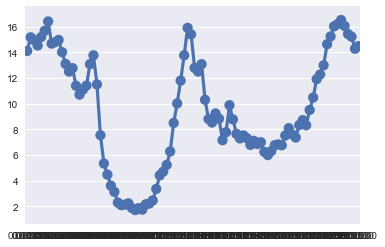

In [14]:
#how to make xticks hourly?
avg_15 = dx.groupby(dx.index.time).mean()
sns.pointplot(avg_15.index, avg_15.values)

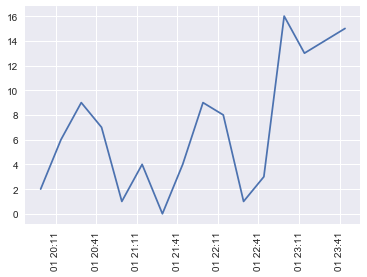

In [15]:
plt.xticks(rotation=90)
plt.plot(dx['1970-01-01'])

In [25]:
fix = dx.resample('D').sum()

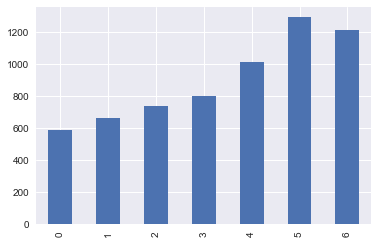

In [27]:
fix.groupby(fix.index.dayofweek).mean().plot(kind='bar')
fix

In [22]:
dx[dx.index.dayofweek==0]

1970-01-05 00:00:00     8.0
1970-01-05 00:15:00     3.0
1970-01-05 00:30:00     7.0
1970-01-05 00:45:00     4.0
1970-01-05 01:00:00     7.0
1970-01-05 01:15:00     5.0
1970-01-05 01:30:00     7.0
1970-01-05 01:45:00     5.0
1970-01-05 02:00:00     5.0
1970-01-05 02:15:00     1.0
1970-01-05 02:30:00     1.0
1970-01-05 02:45:00     4.0
1970-01-05 03:00:00     3.0
1970-01-05 03:15:00     2.0
1970-01-05 03:30:00     2.0
1970-01-05 03:45:00     7.0
1970-01-05 04:00:00     2.0
1970-01-05 04:15:00     2.0
1970-01-05 04:30:00     2.0
1970-01-05 04:45:00     6.0
1970-01-05 05:00:00     6.0
1970-01-05 05:15:00     5.0
1970-01-05 05:30:00     2.0
1970-01-05 05:45:00     1.0
1970-01-05 06:00:00     1.0
1970-01-05 06:15:00     1.0
1970-01-05 06:30:00     0.0
1970-01-05 06:45:00     2.0
1970-01-05 07:00:00     0.0
1970-01-05 07:15:00     1.0
                       ... 
1970-04-13 11:30:00    13.0
1970-04-13 11:45:00     7.0
1970-04-13 12:00:00     6.0
1970-04-13 12:15:00    11.0
1970-04-13 12:30:00 

In [17]:
dr = pd.DataFrame({'Counts':dx.values,'Day of Week':dx.index.dayofweek}, index = dx.index)
dr.loc[:,'Day of Week'] = dr.loc[:,'Day of Week'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday', 4:'Friday',5:'Saturday',6:'Sunday'})

In [18]:
dr

,Counts,Day of Week
1970-01-01 20:00:00,2.0,Thursday
1970-01-01 20:15:00,6.0,Thursday
1970-01-01 20:30:00,9.0,Thursday
1970-01-01 20:45:00,7.0,Thursday
1970-01-01 21:00:00,1.0,Thursday
1970-01-01 21:15:00,4.0,Thursday
1970-01-01 21:30:00,0.0,Thursday
1970-01-01 21:45:00,4.0,Thursday
1970-01-01 22:00:00,9.0,Thursday
1970-01-01 22:15:00,8.0,Thursday


In [19]:
ref = dr.groupby('Day of Week',sort=False).mean()
#ref = dr.groupby('Day of Week',sort=False).sum()
#the means seem way too low.  weird because sum seems to make more sense

In [20]:
dr.groupby('Day of Week').sum()

,Counts
Day of Week,
Friday,15208.0
Monday,8823.0
Saturday,19377.0
Sunday,18167.0
Thursday,11960.0
Tuesday,9268.0
Wednesday,10339.0


Text(0,0.5,u'Average Logins per Day')

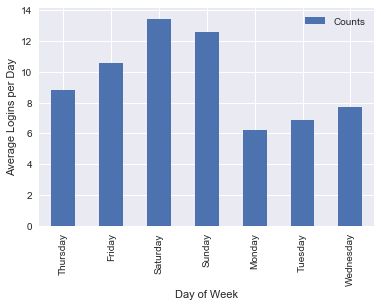

In [21]:
dr.groupby('Day of Week',sort=False).mean().plot(kind='bar')
plt.ylabel('Average Logins per Day')
#these counts are way too low

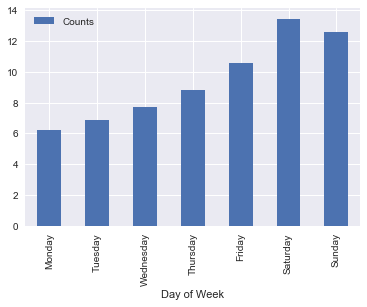

In [22]:
referee = ref.iloc[4:]
eazy = referee.append(ref.iloc[:4])
eazy.plot(kind='bar')

Logins are lowest on Monday and grow steadily until Saturday.  On Sunday they dip slightly.

In [23]:
dk = dx.resample('H').sum()
dk.head()

1970-01-01 20:00:00    24.0
1970-01-01 21:00:00     9.0
1970-01-01 22:00:00    21.0
1970-01-01 23:00:00    58.0
1970-01-02 00:00:00    53.0
Freq: H, dtype: float64

Text(0,0.5,u'Average Logins per Hour')

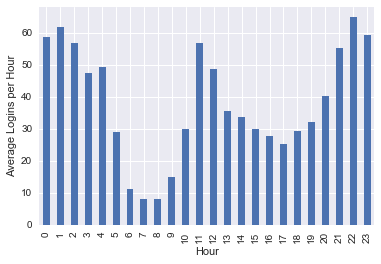

In [24]:
dk.groupby(dk.index.hour).mean().plot(kind='bar')
plt.xlabel('Hour'); plt.ylabel('Average Logins per Hour')

Between the hours of 6-10 AM is a dead time.  This would suggest that ultimate users do not get rides to work and prefer other methods of transportation. Uber logins then peak during the lunch hour before dropping to a local minimum at 5 PM.  Again we see that users would rather take other modes of transportation for work commutes.  Starting at 5, logins grow rapidly before rapidly, reaching the daily peak between the hours of 10 PM to 3 AM. The data provides a nice visualization of the unspoken rule that its ok to drink after 5 PM.  One major motivation for users to call an Ultimate car is because they plan on drinking.  As the night goes on people are less willing to take public transportation or the bus/train stops running and they prefer to take Ultimate rides.  This fits with logins growing over the course of the weak and peaking on Saturday.

 What would    you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  

I would measure the percentage increase in rides starting in one city and ending in another.  Since the addresses of these two locations are stored it should not be hard to detect a bay crossing and calculate a weekly or monthly average.  Once the system is in place tracking bay crossing would be as easy as counting the length of list of reimbursements or using addresses again.

Possible confounding variables:  There may be underlying cycle in demand from month to month that need to be controlled for.  Daily and Weekly demand cycles are controlled for by selecting a trial period of several weeks.  First lets see if there is a monthly cycle to worry about.  The number of days in the month

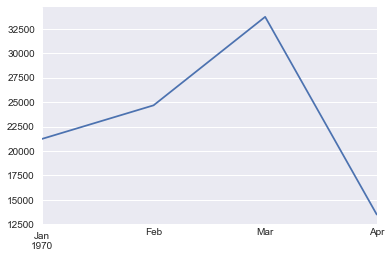

In [73]:
dx.resample('M').sum().plot()

In [74]:
dx.tail()
# Ok heres the data quality issue part.  The data ends halfway through April on the 13th

1970-04-13 17:45:00    5.0
1970-04-13 18:00:00    5.0
1970-04-13 18:15:00    2.0
1970-04-13 18:30:00    7.0
1970-04-13 18:45:00    6.0
Freq: 15T, dtype: float64

Data Quality Issues: The data begins at 20:00 on the first of January but ends at 18:45 on April 13.  This must be corrected for or April numbers will very small.  I do not have enough data to track monthly demand cycles

The Experiment: The experiment will use data recorded from four weeks of Ultimate service.  The first two weeks no bridge reimbursement will be offered and they will be offered in the final two weeks.  A time period of at least a week is required to avoid complications from weekly demand cycles.  As we have seen demands grows over the course of a week and differences in logins would be confounded by this cycle if we dont make the test period at least two weeks.  By doubling that period we also remove confounding variables such as holiday like Halloween, Cinco de Mayo etc where drinking is more common on weekdays.  Ideally these periods would alternate such that reimbursements were given on the 2nd and 4th week and not the 1st and 3rd in order to account for monthly demand cycles but this approach would anger drivers and impede the word-of-mouth spread of this new program.

Ultimate has a database that records the origin and destination of each Ultimate ride, and it would not be difficult to query this database to find rides originating at a Gotham address and ending at a Metropolis address or vice verse.  Once I had the correct rows of the database I would look at the total amount netted by Ultimate from these rides.  The two phases of the experiment are both 14 days long, starting on Monday and concluding on Sunday, so looking at total net income from trans-bay rides is equivalent looking at averages.  Tracking total trans-bay rides is a good way to measure if the program incentivizes drives but looking at profit demonstrates whether the program is worth it for Ultimate.

Statistical Significance: The standard alpha value of .5 seems sufficient here.  I would assume the null hypothesis that reimbursement has no effect on total profit from Ultimate rides and compute the probability that the observed difference in total rides occurs. I can calculate the standard deviation of net income for two year periods going back a year

Interpretation: If the p-value was significant I would report that the reimbursement program was, in fact making a difference.  I would report how much additional income the reimbursement had brought Ultimate as a percentage of the total earnings, to show how significant a difference the program makes.  If the program nets a tiny portion of total income, its more trouble than its worth, and if its larger than I would recommend the program continue.

Another interesting thing to look at would be growth of the program over phase 2 of the experiment.  If there is large growth in the number of drives taking advantage of the program over phase 2 that would demonstrate that advertising of the new program is necessary.  This would require calculating increase in net profit relative to advertising costs.